In [1]:
# Importing relevant libraries
import pandas as pd

### Loading Datasets

In [2]:
# Loading datasets
content = pd.read_csv('Content.csv')
reactions = pd.read_csv('Reactions.csv')
reaction_types = pd.read_csv('ReactionTypes.csv')


In [3]:
# Checking dataframe shapes
datasets = [content, reaction_types, reactions]

for dataframe in datasets:
    print('-', dataframe.shape, '\n')

- (1000, 6) 

- (16, 4) 

- (25553, 5) 



In [4]:
# Dropping Null entries
for dataframe in datasets:
    dataframe.dropna(axis=0, inplace=True)

In [5]:
for dataframe in datasets:
    print('-', dataframe.shape, '\n')

- (801, 6) 

- (16, 4) 

- (22534, 5) 



### Data Cleaning
1. Content Dataset Preview

In [6]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
# Cleaning Content Dataset

#Dropping Empty rows
# content.dropna(inplace=True)
# Dropping Irrelevant columns
content.drop(['Unnamed: 0', 'User ID'], axis=1, inplace=True)
# Renaming column Type
content.rename({'Type':'Content Type'}, axis=1, inplace=True)

print('Content Shape', content.shape)
content.head()

Content Shape (801, 4)


,Content ID,Content Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [8]:
content.isna().sum()

Content ID      0
Content Type    0
Category        0
URL             0
dtype: int64

2. Reactions Dataset

In [9]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [10]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22534 non-null  int64 
 1   Content ID  22534 non-null  object
 2   User ID     22534 non-null  object
 3   Type        22534 non-null  object
 4   Datetime    22534 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [11]:
# Cleaning Reactions df: Changing datetime object dtype and Dropping Irrelevant columns

reactions['Datetime'] = pd.to_datetime(reactions['Datetime'])
# reactions.dropna(inplace=True)
reactions.rename({'Type':'Reaction Type'}, axis=1, inplace=True)
reactions.drop(['User ID', 'Unnamed: 0'], axis=1, inplace=True)
print('Reactions df Shape -', reactions.shape)
print('-'*50)
print(reactions.info())
reactions.head()


Reactions df Shape - (22534, 3)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 704.2+ KB
None


,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


3. Reaction Types Dataset

In [12]:
reaction_types

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [13]:
reaction_types.drop('Unnamed: 0', axis=1, inplace=True)
reaction_types.rename({'Type':'Reaction Type'}, axis=1, inplace=True)
print(reaction_types.dtypes, '\n')
reaction_types.head()

Reaction Type    object
Sentiment        object
Score             int64
dtype: object 



,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [14]:
# Checking columns
for dataframe in datasets:
    print(dataframe.columns, '\n')

Index(['Content ID', 'Content Type', 'Category', 'URL'], dtype='object') 

Index(['Reaction Type', 'Sentiment', 'Score'], dtype='object') 

Index(['Content ID', 'Reaction Type', 'Datetime'], dtype='object') 



In [15]:
# merging dataframes
merged_df = pd.merge(reactions, content , on='Content ID', how='left')
print(merged_df.shape)
merged_df.head()

(22534, 6)


,Content ID,Reaction Type,Datetime,Content Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...


In [16]:
final_df = pd.merge(merged_df, reaction_types, on='Reaction Type', how='left')
final_df

,Content ID,Reaction Type,Datetime,Content Type,Category,URL,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,positive,30
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...,negative,12


In [17]:
final_df.shape

(22534, 8)

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 0 to 22533
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Datetime       22534 non-null  datetime64[ns]
 3   Content Type   18384 non-null  object        
 4   Category       18384 non-null  object        
 5   URL            18384 non-null  object        
 6   Sentiment      22534 non-null  object        
 7   Score          22534 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.5+ MB


In [19]:
# Setting Columns names to lower case to eliminate duplicates
final_df['Category'] = final_df['Category'].str.lower()

In [20]:
category_scores = final_df.groupby('Category')['Score'].sum().sort_values(ascending=False)

top_5_categories = category_scores.head(5).index

final_df['Top 5 Category'] = final_df['Category'].isin(top_5_categories)

final_df.loc[180:250]

,Content ID,Reaction Type,Datetime,Content Type,Category,URL,Sentiment,Score,Top 5 Category
180,b18cb63f-4c8e-44ee-a47f-541e95191d11,intrigued,2021-03-21 14:39:14,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...,positive,45,False
181,b18cb63f-4c8e-44ee-a47f-541e95191d11,super love,2021-04-07 03:15:32,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...,positive,75,False
182,b18cb63f-4c8e-44ee-a47f-541e95191d11,cherish,2021-04-24 06:56:18,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...,positive,70,False
183,b18cb63f-4c8e-44ee-a47f-541e95191d11,heart,2020-09-30 14:05:52,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...,positive,60,False
184,b18cb63f-4c8e-44ee-a47f-541e95191d11,scared,2021-01-21 07:08:24,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...,negative,15,False
...,...,...,...,...,...,...,...,...,...
246,0be59876-d70c-486c-8e0b-a06bef7a2cd6,interested,2020-08-27 18:36:22,GIF,tennis,https://socialbuzz.cdn.com/content/storage/0be...,positive,30,False
247,0be59876-d70c-486c-8e0b-a06bef7a2cd6,heart,2020-10-15 01:29:34,GIF,tennis,https://socialbuzz.cdn.com/content/storage/0be...,positive,60,False
248,0be59876-d70c-486c-8e0b-a06bef7a2cd6,peeking,2021-01-15 11:33:42,GIF,tennis,https://socialbuzz.cdn.com/content/storage/0be...,neutral,35,False
249,0be59876-d70c-486c-8e0b-a06bef7a2cd6,intrigued,2021-03-01 20:26:23,GIF,tennis,https://socialbuzz.cdn.com/content/storage/0be...,positive,45,False


In [21]:
final_df.to_csv('cleaned_dataset_with_top_5_categories.csv', index=False)

In [22]:
top_5_categories = category_scores.head(5).index
print(top_5_categories)

Index(['travel', 'science', 'healthy eating', 'animals', 'cooking'], dtype='object', name='Category')


In [23]:
final_df['Top 5 Category'].value_counts()

False    15912
True      6622
Name: Top 5 Category, dtype: int64

### Visualization 

In [24]:
# importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# pip install pandas openpyxl

In [26]:
df = pd.read_excel('cleaned_file_with_top_categories.xlsx')
df

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:00,photo,Studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,Studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,Studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:00,photo,Studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,Studying,positive,30
...,...,...,...,...,...,...,...,...
22529,25547,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:00,audio,technology,negative,12
22530,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:00,audio,technology,negative,10
22531,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:00,audio,technology,positive,45
22532,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:00,audio,technology,negative,12


In [31]:
df['Category'] = df['Category'].str.title()
df['Category'].value_counts()

Animals            1738
Science            1646
Healthy Eating     1572
Technology         1557
Food               1556
Culture            1538
Cooking            1525
Travel             1510
Soccer             1339
Education          1311
Fitness            1284
Studying           1251
Dogs               1227
Tennis             1218
Veganism           1146
Public Speaking    1116
Name: Category, dtype: int64

In [32]:
top_category = df.groupby('Category')['Score'].sum().sort_values(ascending=False)
top_category

Category
Animals            68624
Science            65405
Healthy Eating     63138
Technology         63035
Food               61598
Culture            60663
Travel             59358
Cooking            59174
Soccer             53216
Education          52759
Fitness            50835
Studying           49442
Dogs               48398
Tennis             46185
Veganism           45901
Public Speaking    45751
Name: Score, dtype: int64

In [36]:
pop_5_categories = top_category.head(5).reset_index()
pop_5_categories

,Category,Score
0,Animals,68624
1,Science,65405
2,Healthy Eating,63138
3,Technology,63035
4,Food,61598


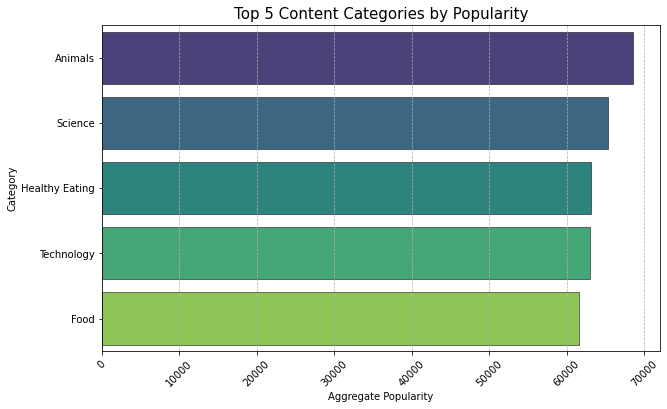

In [47]:
# Top 5 categories plot

plt.figure(figsize=(10,6))
sns.barplot(x='Score', y='Category', data=pop_5_categories, palette='viridis', ci=None, linewidth=0.5, edgecolor='black')

# Adding Grid lines
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)


plt.title('Top 5 Content Categories by Popularity', size=15)
plt.xlabel('Aggregate Popularity')
plt.ylabel('Category')
plt.xticks(rotation=45);

### Unique Content Categories

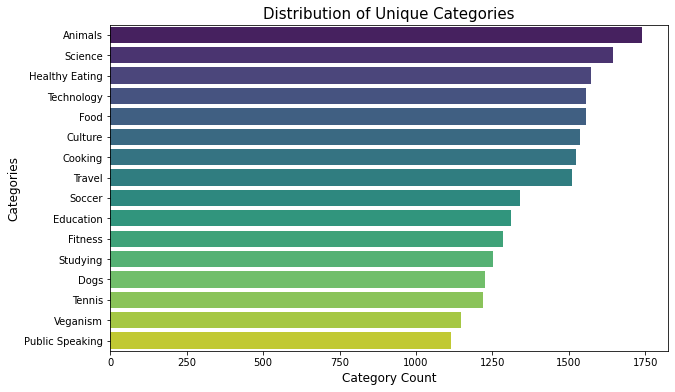

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')

plt.title('Distribution of Unique Categories', size=15)
plt.xlabel('Category Count', fontsize=12)
plt.ylabel('Categories', fontsize=12);


### Reactions to the Most Popular Category

In [78]:
# Identifying most pop category
most_pop_category = df.groupby('Category')['Score'].sum().idxmax()
# Filter to have only most pop category
filtered_df = df[df['Category'] == most_pop_category]

reaction_counts = filtered_df['Reaction Type'].value_counts().reset_index()
reaction_counts.columns = ['Reaction Type', 'Count']

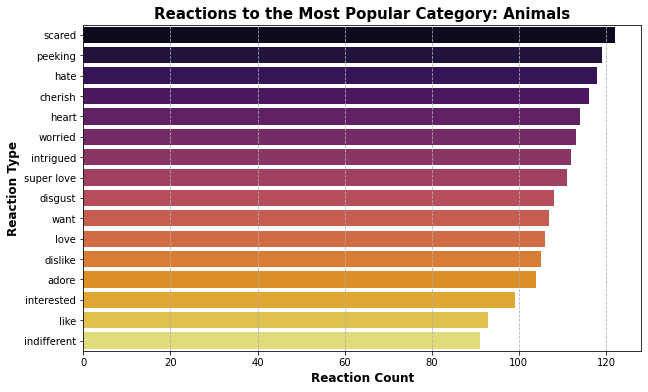

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Reaction Type', data=reaction_counts, palette='inferno')
# Adding Titles and Labels
plt.title(f'Reactions to the Most Popular Category: {most_pop_category}', fontweight='bold',fontsize=15)
plt.xlabel('Reaction Count',fontweight='bold', fontsize=12)
plt.ylabel('Reaction Type', fontweight='bold',fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.8);

### Month with the Most Posts

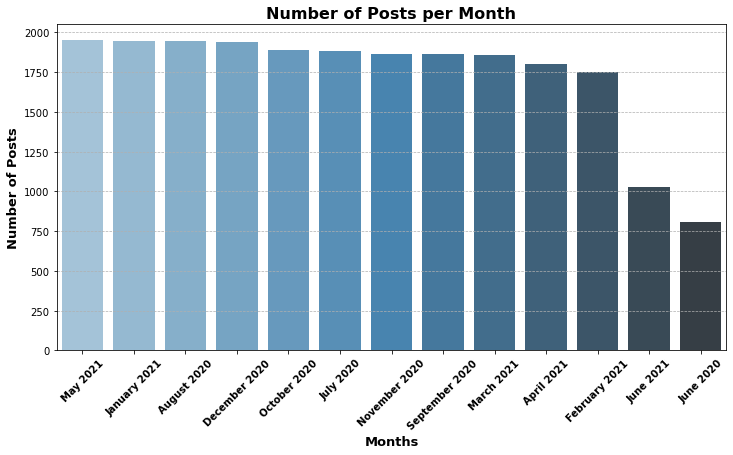

In [129]:
# Extracting Month from Datetime column
df['Year-Month'] = df['Datetime'].dt.to_period('M')

# Posts per month
monthly_counts = df['Year-Month'].value_counts().sort_index().reset_index()
monthly_counts.columns = ['Year-Month', 'Post Count']

# Mapping month number to names for readability
monthly_counts['Month'] = monthly_counts['Year-Month'].apply(lambda x: x.strftime('%B %Y'))

# Sorting the df by Post Count
monthly_counts_sorted = monthly_counts.sort_values(by='Post Count', ascending=False)

# Plotting monthly counts
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Post Count', data=monthly_counts_sorted, palette='Blues_d')

# Adding titles and Labels
plt.title('Number of Posts per Month',fontweight='bold', size=16)
plt.xlabel('Months',fontweight='bold', fontsize=13)
plt.ylabel('Number of Posts',fontweight='bold', fontsize=13)

plt.xticks(rotation=45, fontweight='bold')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7);